In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import stats

df = pd.read_csv("F:\\gnr652\\assignment-rw\\FlightDelays.csv")

df


,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,645,RU,644,EWR,199,1/31/2004,2761,DCA,0,6,31,N15555,ontime
2197,1700,RU,1653,EWR,213,1/31/2004,2497,IAD,0,6,31,N16976,ontime
2198,1600,RU,1558,EWR,199,1/31/2004,2361,DCA,0,6,31,N14902,ontime
2199,1359,RU,1403,EWR,199,1/31/2004,2216,DCA,0,6,31,N16961,ontime


In [11]:


def clean_data(df):
    # Create a copy of the original dataframe so the original is not modified
    df2 = df.copy()
    df['Flight Status']=np.where(df['Flight Status']=='ontime', '0', df['Flight Status'])
    df['Flight Status']=np.where(df['Flight Status']=='delayed', '1', df['Flight Status'])
    # Create dummy variables
    df2 = pd.get_dummies(df2)
    
    # Return cleaned dataframe
    return df2
df1 = clean_data(df)
X=df1.drop(['Flight Status_delayed','Flight Status_ontime'],axis=1)

In [12]:
y=df['Flight Status']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=888)


In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
kfold = StratifiedKFold(n_splits=10, random_state=888)


In [15]:
lr_model = LogisticRegressionCV(cv=kfold,class_weight='balanced',random_state=888)
lr_model.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight='balanced',
                     cv=StratifiedKFold(n_splits=10, random_state=888, shuffle=False),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='warn',
                     n_jobs=None, penalty='l2', random_state=888, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [16]:

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, confusion_matrix, classification_report

Mean Accuracy: 0.8750360460485009
Mean Log Loss: -0.4232296626189365
Mean Area Under ROC Curve: 0.8522709873445194
              precision    recall  f1-score   support

           0       0.94      0.89      0.91       710
           1       0.63      0.75      0.68       171

    accuracy                           0.86       881
   macro avg       0.78      0.82      0.80       881
weighted avg       0.88      0.86      0.87       881



Text(0.5, 15.0, 'Predicted Label')

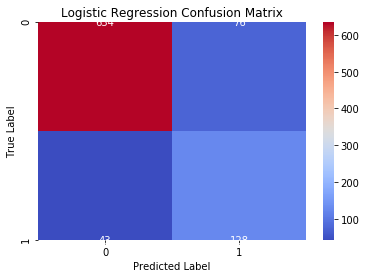

In [17]:
def print_eval_scores(model, X_train, y_train, cv):
    accuracy = cross_val_score(model, X_train, y_train, cv=cv,scoring='accuracy')
    log_loss = cross_val_score(model, X_train, y_train, cv=cv, scoring='neg_log_loss')
    roc_auc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')

    print('Mean Accuracy: %s' % accuracy.mean())
    print('Mean Log Loss: %s' % log_loss.mean())
    print('Mean Area Under ROC Curve: %s' % roc_auc.mean())
    
print_eval_scores(lr_model, X_train, y_train, kfold)

y_pred_lr = lr_model.predict(X_test)

print(classification_report(y_test, y_pred_lr))


lr_cm = confusion_matrix(y_test,y_pred_lr)

ax = sns.heatmap(lr_cm,annot=True,cmap='coolwarm',fmt='.0f')
ax.set_title('Logistic Regression Confusion Matrix')
ax.set_ylabel('True Label')
ax.set_xlabel('Predicted Label')


In [1]:
17//10


1